In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gp
import collections
import csv

# Amount of Speed Humps per Pittsburgh Suburb
##### For my dataset, I examined the amount of speed humps per Pittsburgh suburb, Although commonly found near schools, parks, and community centers, speed humps are great traffic enforcers. They cause the driver to slow down and obey the speed limit to avoid risk of damaging the car. If you were to start a family, you would want the safest conditions possible for your children, and speed humps help to maintain safe driving and provide an enhanced sense of awareness for the driver.

In [2]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

##### Below is the code I compiled to import the speed hump data from my humps.csv file and output it in the form of a chart, a density map, and a bar graph

,Neighborhood,Total Humps
1,Squirrel Hill South,18
13,Carrick,9
2,North Oakland,6
5,Polish Hill,6
11,Upper Hill,4
3,Brookline,4
15,South Side Slopes,4
6,Homewood South,4
14,Perry North,4
8,South Side Flats,3


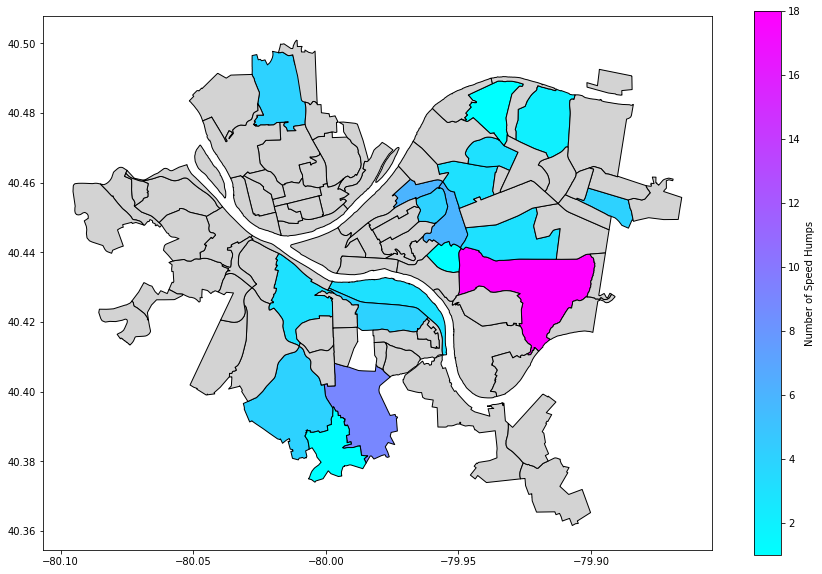

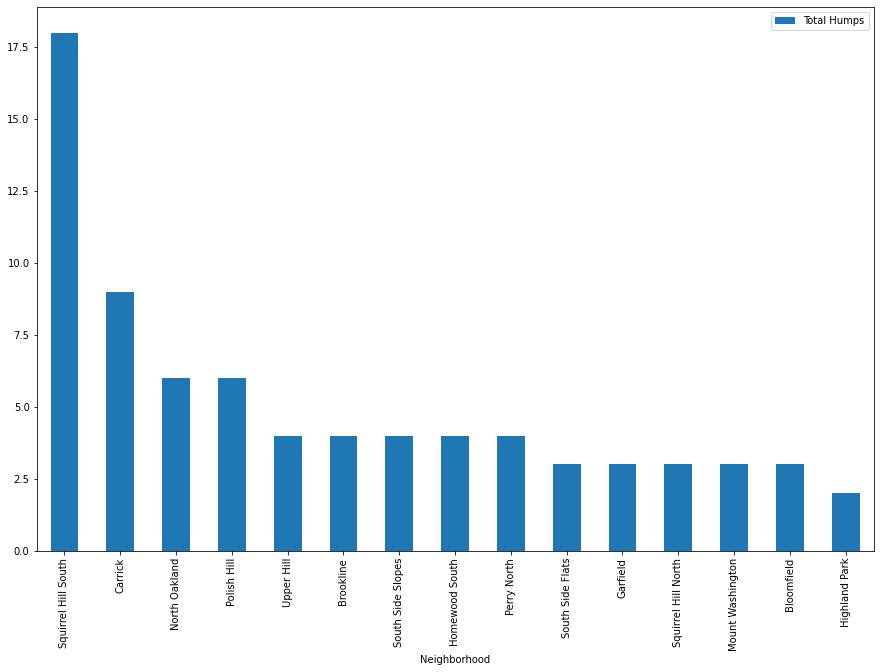

In [16]:
humps = collections.Counter()
with open('humps.csv') as data:
    for x in csv.reader(data):
        humps[x[6]] += 1
        
humps_df = pd.DataFrame.from_records(list(dict(humps).items()), columns=['Neighborhood','Total Humps'])
humps_total = humps_df.groupby('Neighborhood').sum()['Total Humps']
humps_map = neighborhoods.merge(humps_total, how='left', left_on='hood', right_on='Neighborhood')
humps_map.plot(column = "Total Humps",
              cmap='cool',
              edgecolor="black",
              legend=True,
              legend_kwds={'label': "Number of Speed Humps"},
              figsize=(15,10),
              missing_kwds={"color": "lightgrey"}
              )

highestvalues = humps_df.sort_values("Total Humps", ascending = False).head(15)
highestvalues.plot(kind = 'bar', x = "Neighborhood", y = "Total Humps", figsize=(15,10))
highestvalues

##### Above are three graphs showing the top 15 neighborhoods ranked by the amount of speed humps they have. There is a chart, a density map, and a bar graph. For the density map, the more purple the color is, the more speed humps the suburb has. The more sky blue the color is, the less speed humps the suburb has. Grey suburbs have been reported to have 0 speed humps. The chart lists the exact amount each suburb has and ranks them from 1-15. The bar graph shows the top 15 suburbs in order of most speed humps to least. The higher the bar, the more speed humps a suburb has.

## Top 3 Neighborhoods Based on Speed Humps

### 1. Squirrel Hill South
### 2. Carrick
### 3. Tie between North Oakland & Polish Hill

##### As shown by the graphs above, Squirrel Hill South has the most speed humps, providing the safest road conditions for nearby children. With 18 speed humps, Squirrel Hill South has double the amount of the suburb with the second highest amount of speed humps, which is Carrick with 9 speed humps. The remaining neighborhoods have a closer margin, and most tie up the amount. North Oakland and Polish Hill have the third most speed humps at four, then there are 5 neighborhoods each consisting of 4 speed humps, followed by 5 more neighborhoods each consisting of 3 speed humps. Although the margin for the lower ranked neighborhoods is very small, the gap between North Oakland (3) and Squirrel Hill South (18) is 15 speed humps. The best neighborhood to raise a family, based on the data collected about speed humps, is Squirrel Hill South.